# Lesson 1 - Caltech 256

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = "./data/256_ObjectCategoriesSplit"

In [4]:
doc(get_transforms)

In [5]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=75)

View data

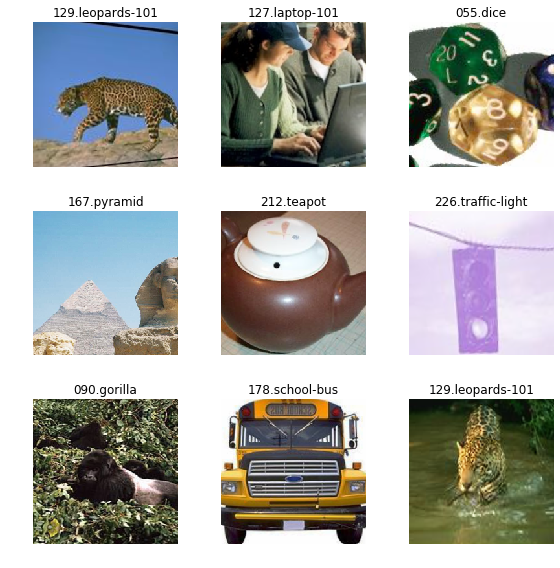

In [6]:
data.show_batch(rows=3, figsize=(8,8))

In [7]:
print(data.classes)
len(data.classes); data.c

['001.ak47', '002.american-flag', '003.backpack', '004.baseball-bat', '005.baseball-glove', '006.basketball-hoop', '007.bat', '008.bathtub', '009.bear', '010.beer-mug', '011.billiards', '012.binoculars', '013.birdbath', '014.blimp', '015.bonsai-101', '016.boom-box', '017.bowling-ball', '018.bowling-pin', '019.boxing-glove', '020.brain-101', '021.breadmaker', '022.buddha-101', '023.bulldozer', '024.butterfly', '025.cactus', '026.cake', '027.calculator', '028.camel', '029.cannon', '030.canoe', '031.car-tire', '032.cartman', '033.cd', '034.centipede', '035.cereal-box', '036.chandelier-101', '037.chess-board', '038.chimp', '039.chopsticks', '040.cockroach', '041.coffee-mug', '042.coffin', '043.coin', '044.comet', '045.computer-keyboard', '046.computer-monitor', '047.computer-mouse', '048.conch', '049.cormorant', '050.covered-wagon', '051.cowboy-hat', '052.crab-101', '053.desk-globe', '054.diamond-ring', '055.dice', '056.dog', '057.dolphin-101', '058.doorknob', '059.drinking-straw', '060.du

257

In [8]:
doc(create_cnn)

## Train model

You are using a pretrained model here basically where the last layer is cut-off and replaced with number of output classes

In [10]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate, accuracy])

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.228701,0.756158,0.189650,0.810350
2,0.996058,0.682428,0.180971,0.819029


In [12]:
learn.save('stage-1')

All layers are now trainable

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find(stop_div=False)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


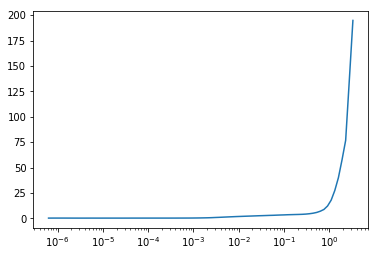

In [15]:
learn.recorder.plot()

In [16]:
learn.save('stage-1')

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

Total time: 07:53
epoch  train_loss  valid_loss  error_rate
1      0.637323    0.634302    0.159756    (03:54)
2      0.354120    0.526333    0.131630    (03:59)



## Interpretation

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

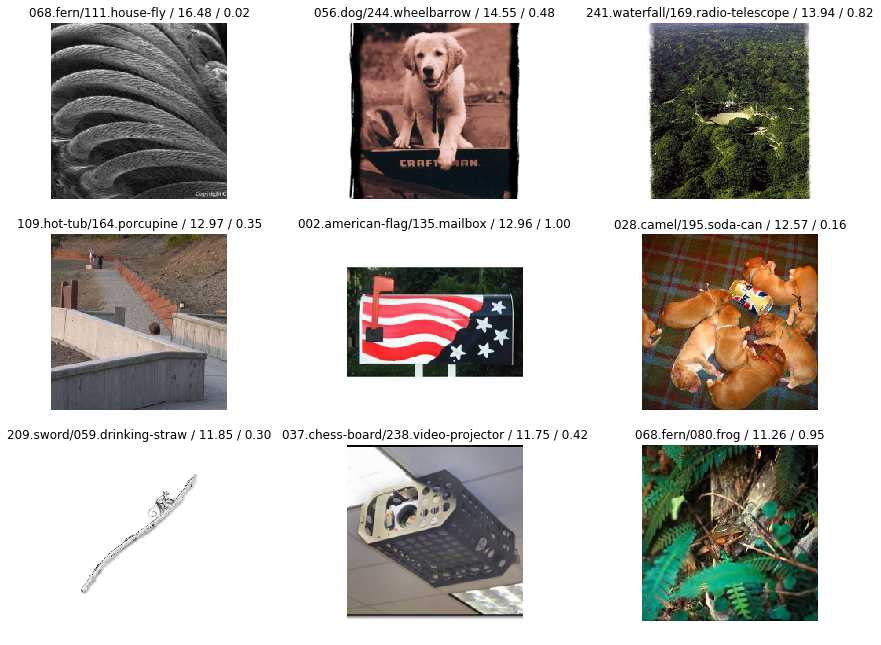

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

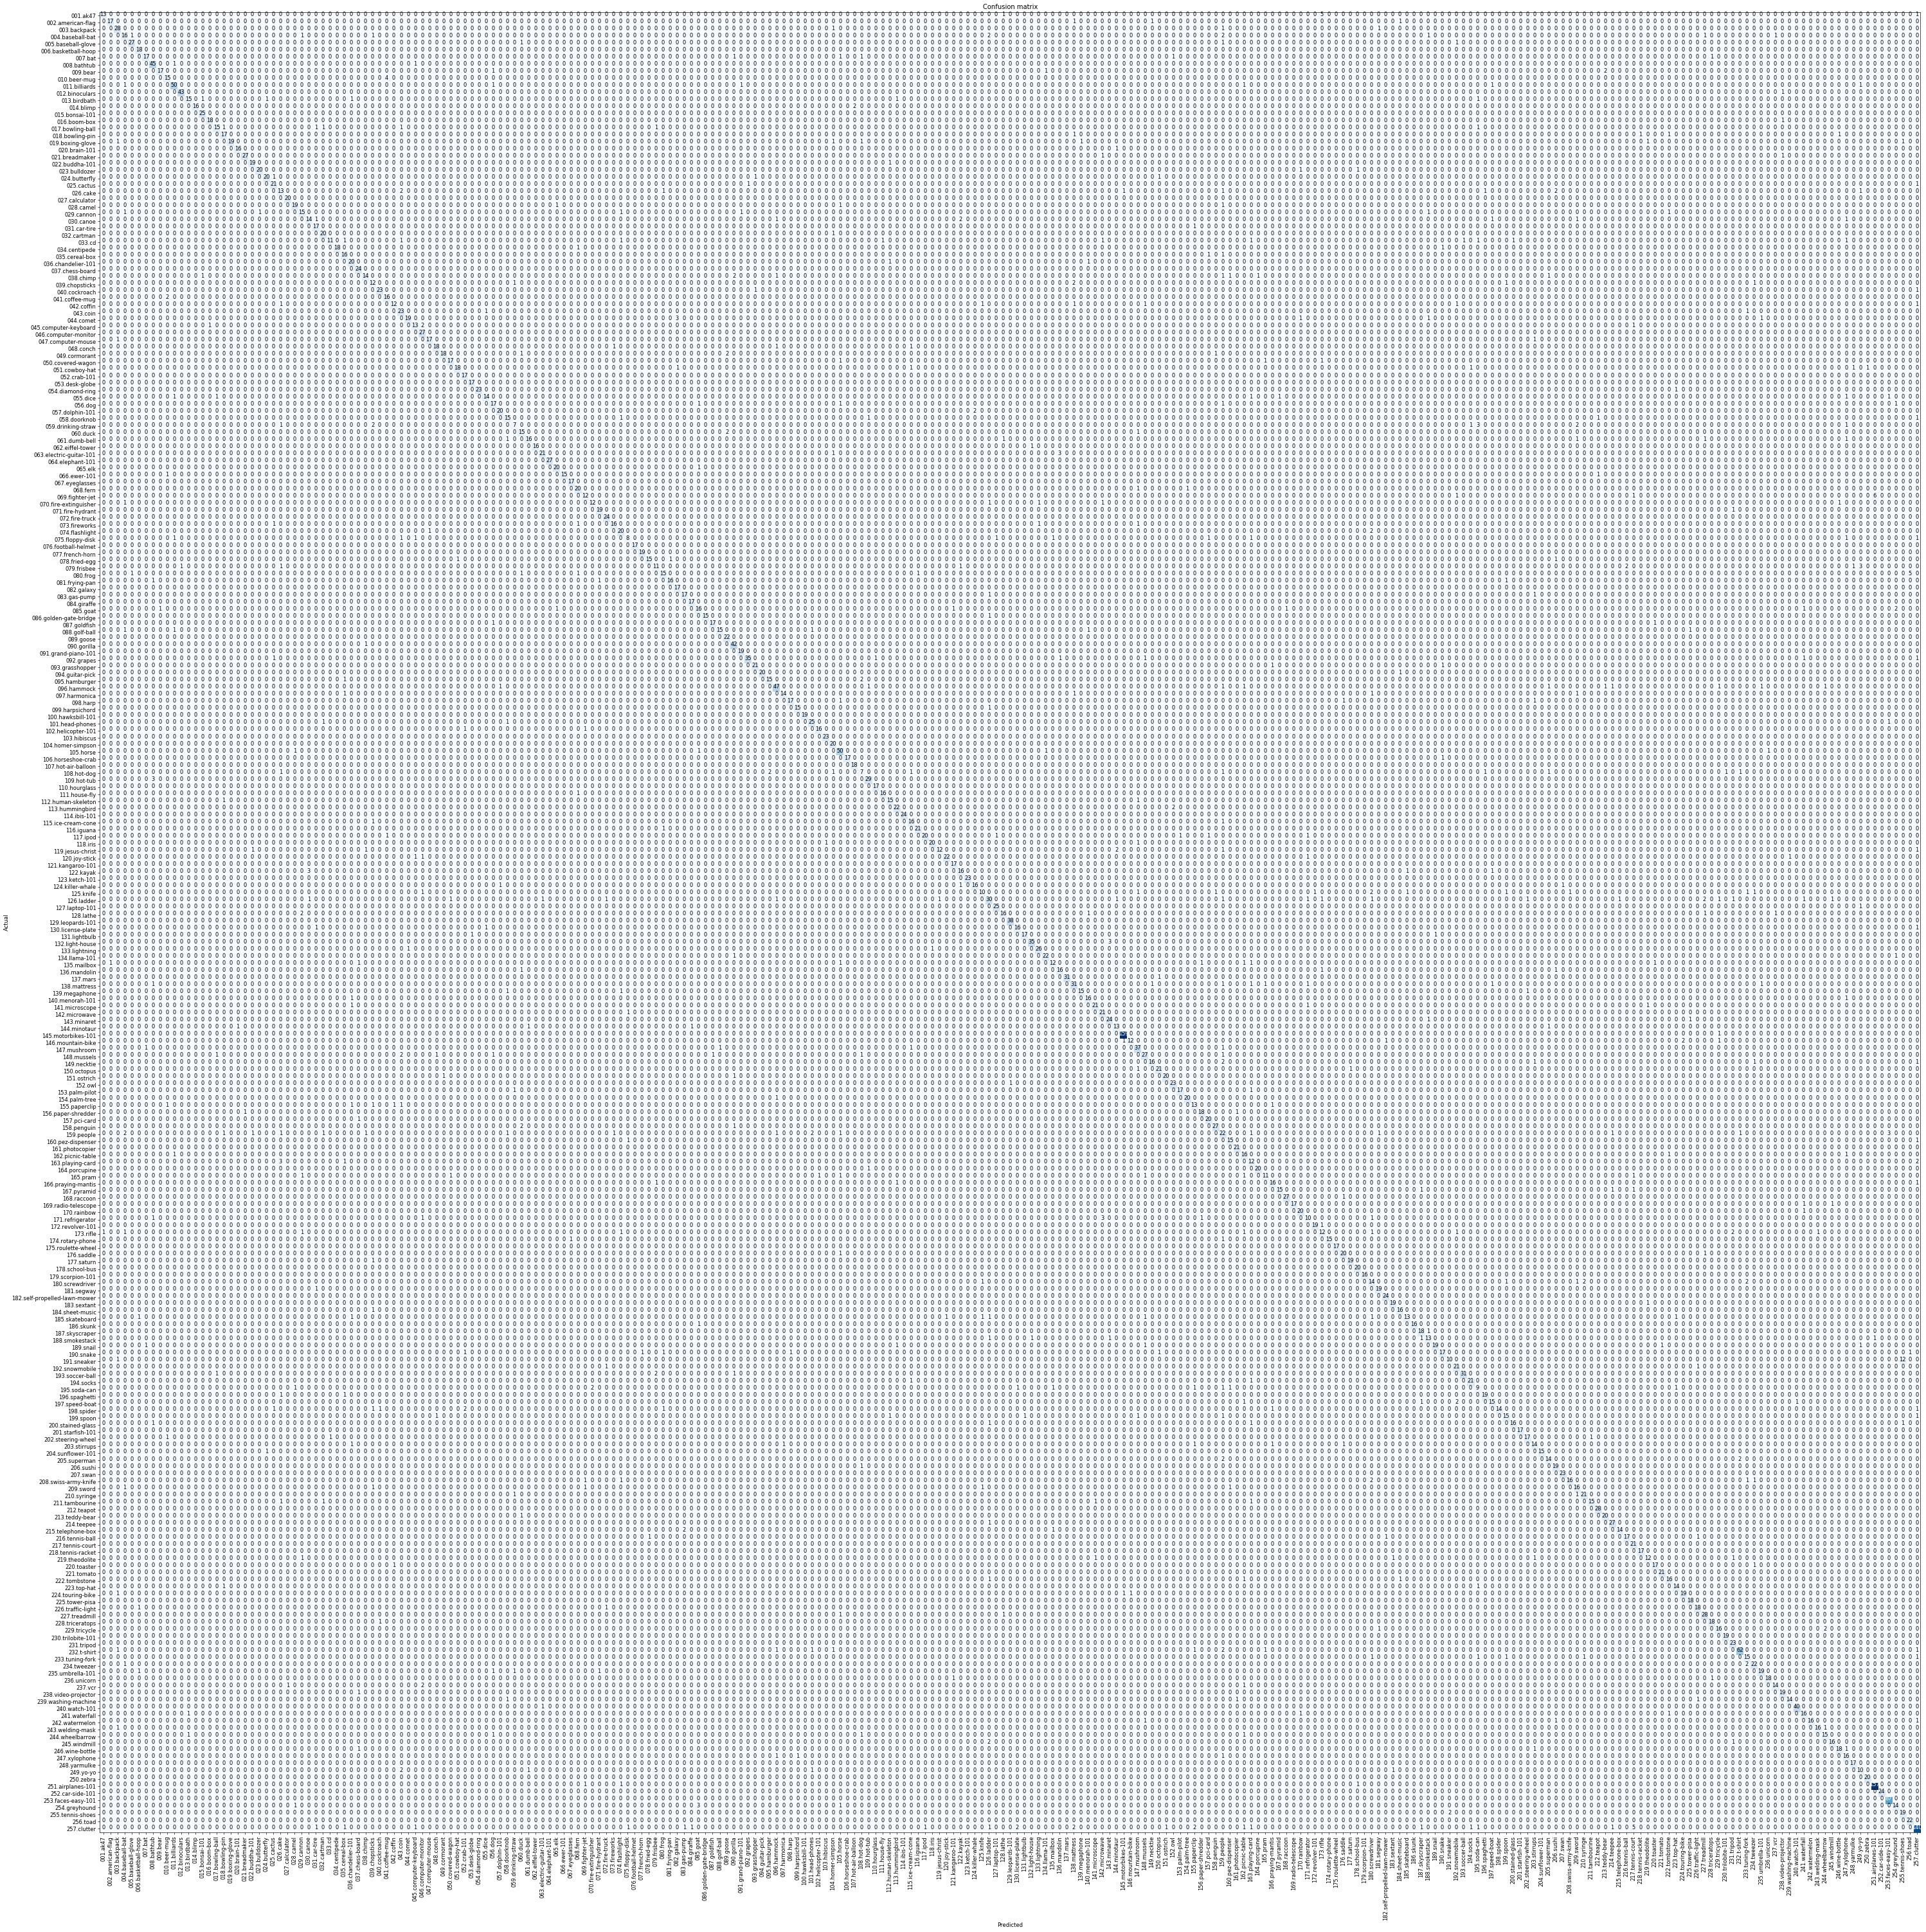

In [22]:
# doc(ClassificationInterpretation)
interp.plot_confusion_matrix(figsize=(50,50), dpi=60)

In [23]:
interp.most_confused(min_val=2)

[('191.sneaker', '255.tennis-shoes', 12),
 ('069.fighter-jet', '251.airplanes-101', 6),
 ('001.ak47', '173.rifle', 5),
 ('080.frog', '256.toad', 5),
 ('249.yo-yo', '079.frisbee', 5),
 ('257.clutter', '217.tennis-court', 5),
 ('010.beer-mug', '041.coffee-mug', 4),
 ('044.comet', '082.galaxy', 3),
 ('059.drinking-straw', '195.soda-can', 3),
 ('063.electric-guitar-101', '136.mandolin', 3),
 ('079.frisbee', '249.yo-yo', 3),
 ('109.hot-tub', '008.bathtub', 3),
 ('122.kayak', '030.canoe', 3),
 ('132.light-house', '143.minaret', 3),
 ('159.people', '253.faces-easy-101', 3),
 ('163.playing-card', '026.cake', 3),
 ('171.refrigerator', '142.microwave', 3),
 ('254.greyhound', '085.goat', 3)]